In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [175]:
def read_file(path: str) -> np.ndarray:
    """
    0:  FREQ (CM-1)
    1:  WAVLEN (MICRN)
    2:  PATH THERMAL (CM-1)
    3:  PATH THERMAL (MICRN)
    4:  SURFACE EMISSION (CM-1)
    5:  SURFACE EMISSION (MICRN)
    6:  SURFACE REFLECTED (CM-1)
    7:  SURFACE REFLECTED (MICRN)
    8:  TOTAL RADIANCE (CM-1)
    9:  TOTAL RADIANCE (MICRN)
    10: INTEGRAL (CM-1)
    11: TOTAL TRANS
    """
    with open(path) as file:
        lines = [line.rstrip() for line in file]

    i: int = 0
    rows: list = []

    while (i < len(lines)):
        if "RADIANCE(WATTS/CM2-STER-XXX)" in lines[i]:
            i = i + 4
            
            for _ in range(50):
                components: list[str] = lines[i].split()
                numbers: list[float] = [float(x) for x in components]
                rows.append(numbers)
                i = i + 1

        i = i + 1

    return np.array(rows)

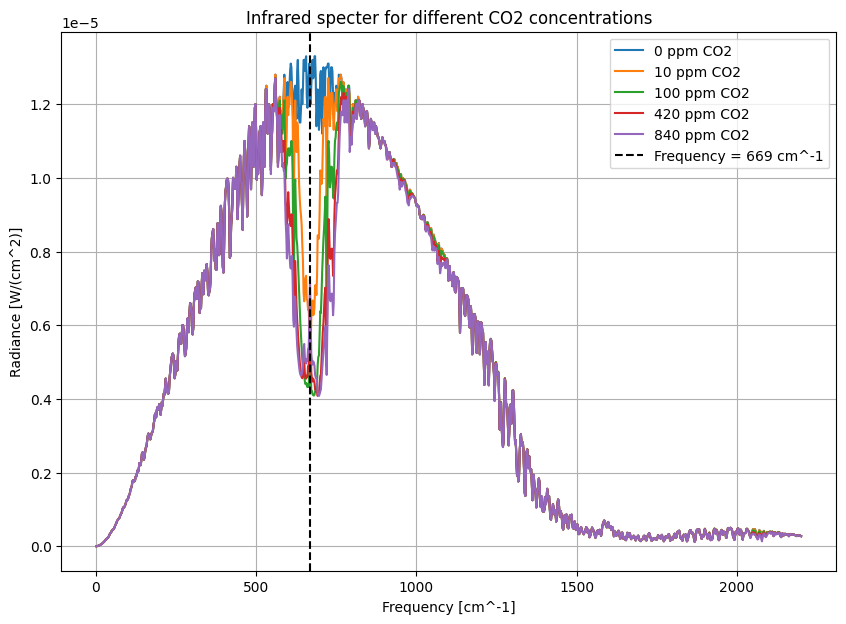

In [176]:
paths: list[list[str]] = [
    ['modtran/modtran0.txt', '0 ppm CO2'],
    ['modtran/modtran10.txt', '10 ppm CO2'],
    ['modtran/modtran100.txt', '100 ppm CO2'],
    ['modtran/modtran420.txt', '420 ppm CO2'],
    ['modtran/modtran840.txt', '840 ppm CO2'],
]

plt.figure(1, figsize=(10, 7))

for path in paths:
    data: np.ndarray = read_file(path[0])
    plt.plot(data[:, 0], data[:, 8], label=path[1])
plt.axvline(x=669, color='k', linestyle='--', label='Frequency = 669 cm^-1')


plt.grid()
plt.title('Infrared specter for different CO2 concentrations') 
plt.xlabel('Frequency [cm^-1]') 
plt.ylabel('Radiance [W/(cm^2)]')
plt.legend(loc=1) 
plt.show()

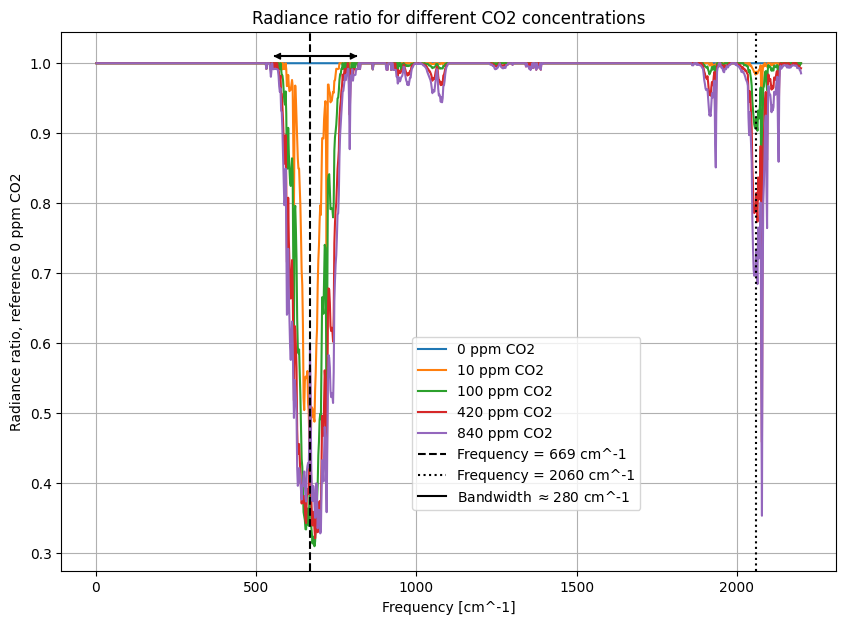

In [177]:
data_0ppm: np.ndarray = read_file('modtran/modtran0.txt')
f1 = 545
f2 = 825

plt.figure(2, figsize=(10, 7))

for path in paths:
    data: np.ndarray = read_file(path[0])
    plt.plot(data[:,0], data[:, 8]/data_0ppm[:,8], label=path[1])

plt.axvline(x=669, color='k', linestyle='--', label='Frequency = 669 cm^-1')
plt.axvline(x=2060, color='k', linestyle=':', label='Frequency = 2060 cm^-1')

plt.plot([f1+15, f2-15], [1.01, 1.01], color='k', linestyle='-', label=rf'Bandwidth $\approx {f2-f1}$ cm^-1')
plt.annotate('', xy=(f1, 1.01), xytext=(f2, 1.01),
             arrowprops=dict(arrowstyle='<|-|>', color='k'))
plt.grid()
plt.xlabel('Frequency [cm^-1]')
plt.ylabel('Radiance ratio, reference 0 ppm CO2')
plt.title('Radiance ratio for different CO2 concentrations')
plt.legend(loc='lower center', bbox_to_anchor=(0.6, +0.1))
plt.show()